In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
beta = 100. # inverse temperature
t = 1. # energy scale for cubic lattice
D = 1. # energy scale for bethe lattice

Loading DMFTlib module:

In [3]:
import DMFTlib
DMFTlib.initialize(beta_value=beta, bethe_lattice_D=D)

In [4]:
N = 10000 # number of imaginary frequencies
tau = DMFTlib.matsubara_time(N) # discrete points in imaginary time
dtau = beta/N
freq = DMFTlib.matsubara_freq(N) # matsubara frequencies, ordered according to np.fft

In [ ]:
#U_list = np.array([0.2,0.6,1.,1.45,1.9,5.])
#U_list = linspace(3.562,3.563,4)
#U_list = np.array([1,2,2.5,3.,4.])
U_list = np.linspace(1,4,13)
numiter = 3200

from multiprocessing import Pool
def calculate(U):
    if U>2.5 and U<3.5: #increase iteration near phase transition
        return DMFTlib.DMFT_loop(G0,U,iterations=numiter*1000,frac_new=0.99)[1]
    else:
        return DMFTlib.DMFT_loop(G0,U,iterations=numiter,frac_new=0.99)[1]
    
# fit various Green's functions and plot the spectral function
G0 = 1. / ( 1j*freq + 2. )

p = Pool(8)


Glocs = p.map(calculate,U_list)
p.terminate()

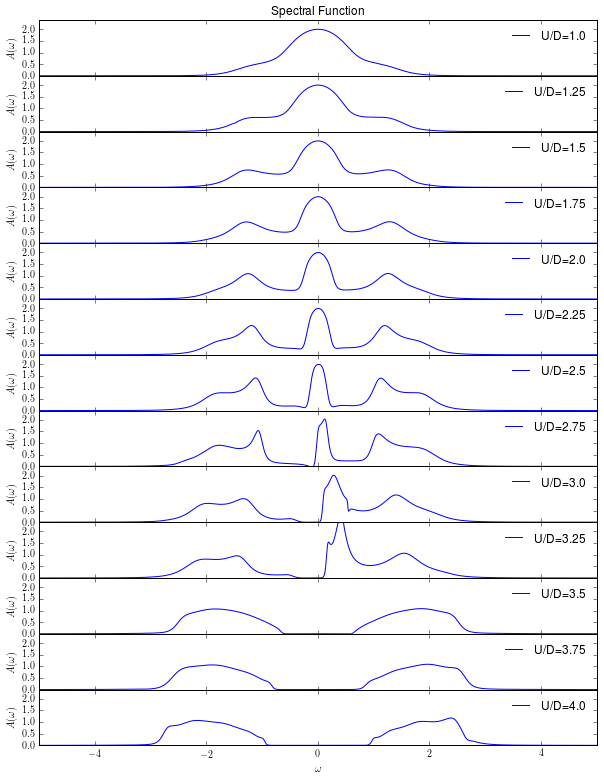

In [11]:
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
eta = 1e-16
plot_freq = np.linspace(-5.,5.,1001)
my_freq = plot_freq +  eta*1j

n = len(Glocs)
fig, ax = plt.subplots(n, sharex=True, sharey=True, figsize=(10,1*n))
for index, gf in enumerate(Glocs):
    padeapp = DMFTlib.PadeApproximation(1j*freq,gf,cut_freq=1.,use_every=3)
    spectral_func = -padeapp(my_freq,norm=0.1).imag
 
    ax[index].plot(plot_freq,spectral_func,'-',label="U/D={}".format(U_list[index]))
    ax[index].set_ylim(0,2.4)
    ax[index].set_xlim(-5.,5.)
    ax[index].legend(frameon=False)
    ax[index].set_xlabel("$\omega$")
    ax[index].set_ylabel("$A(\omega)$")
fig.subplots_adjust(hspace=0)
ax[0].set_title("Spectral Function")

plt.savefig("Mott_transition.pdf",bbox_inches='tight')


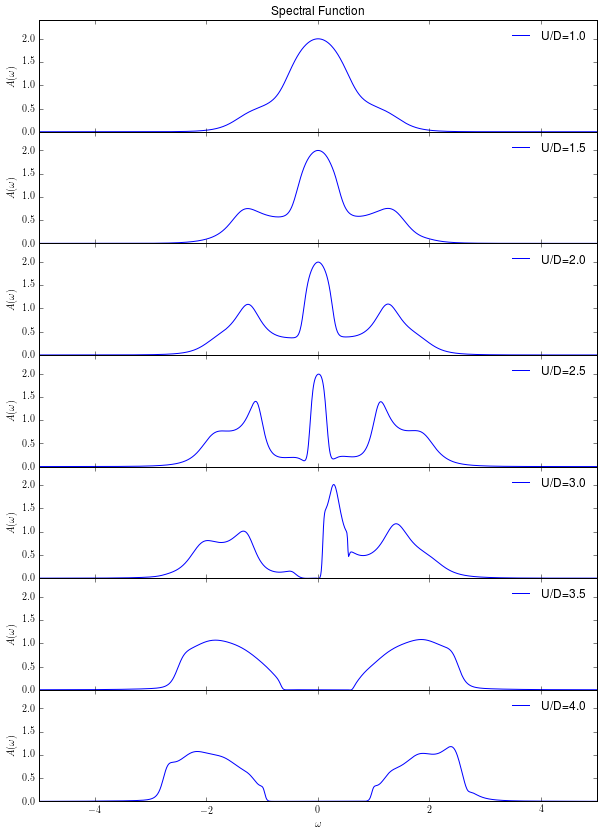

In [14]:
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
eta = 1e-16
plot_freq = np.linspace(-5.,5.,1001)
my_freq = plot_freq +  eta*1j

n = len(Glocs[::2])
fig, ax = plt.subplots(n, sharex=True, sharey=True, figsize=(10,2*n))
for index, gf in enumerate(Glocs[::2]):
    padeapp = DMFTlib.PadeApproximation(1j*freq,gf,cut_freq=1.,use_every=3)
    spectral_func = -padeapp(my_freq,norm=0.1).imag
 
    ax[index].plot(plot_freq,spectral_func,'-',label="U/D={}".format(U_list[::2][index]))
    ax[index].set_ylim(0,2.4)
    ax[index].set_xlim(-5.,5.)
    ax[index].legend(frameon=False)
    ax[index].set_xlabel("$\omega$")
    ax[index].set_ylabel("$A(\omega)$")
fig.subplots_adjust(hspace=0)
ax[0].set_title("Spectral Function")

plt.savefig("Mott_transition_2.pdf",bbox_inches='tight')

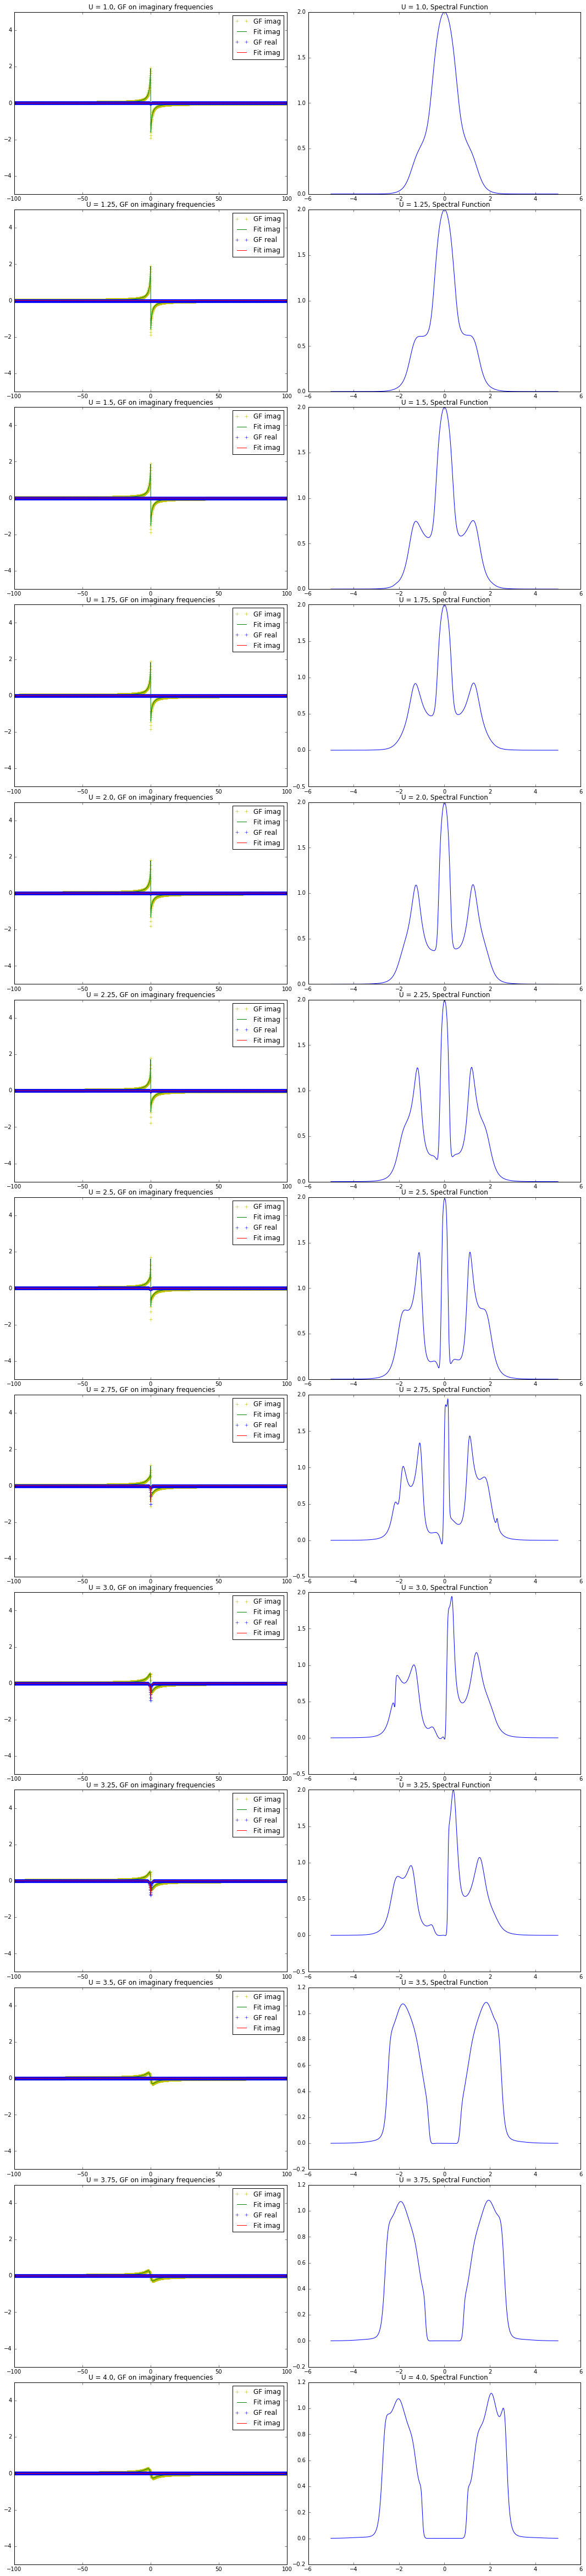

In [48]:
eta = 1e-16
plot_freq = np.linspace(-5.,5.,1001)
my_freq = plot_freq +  eta*1j

fig, ax = plt.subplots(nrows=len(Glocs),ncols=2,figsize=(15,5*len(Glocs)))
fig.tight_layout()
for index, gf in enumerate(Glocs):
    padeapp = DMFTlib.PadeApproximation(1j*freq,gf,cut_freq=1.,use_every=4)
    spectral_func = -padeapp(my_freq,norm=0.01).imag
    fit_plot_freq = np.linspace(freq.min(),freq.max(),3000)
    fit_func = padeapp(1j*fit_plot_freq,norm=0.01)
    if True:
        ax[index,0].set_title("U = {}, GF on imaginary frequencies".format(U_list[index]))
        ax[index,0].plot(freq,gf.imag,'y+',label="GF imag")
        ax[index,0].plot(fit_plot_freq,fit_func.imag,'g-',label="Fit imag")
        ax[index,0].plot(freq,gf.real,'b+',label="GF real")
        ax[index,0].plot(fit_plot_freq,fit_func.real,'r-',label="Fit imag")
        ax[index,0].set_ylim(-5,5)
        ax[index,0].set_xlim(-100,100)
        ax[index,0].legend()  
    ax[index,1].set_title("U = {}, Spectral Function".format(U_list[index]))
    ax[index,1].plot(plot_freq,spectral_func,'-')
    #ax[index,1].set_ylim(0,2)